In [9]:
import numpy as np
from math import sqrt, exp
import matplotlib.pyplot as plt

In [10]:
class Option:

    def __init__(self, spot: float, strike: float, maturity: float, risk_free_rate: float, dividend: float,
                 volatility: float, option_type: str, side: str):
        self.spot = spot
        self.strike = strike
        self.mat = maturity
        self.rate = risk_free_rate
        self.div = dividend
        self.vol = volatility
        self.type = option_type
        self.side = side

In [11]:
class MC_Option_Pricing(Option):

    def __init__(self, spot, strike, maturity, rate, vol, option_type, side, iter_number:int, steps: int, dividend: float = None):
        Option.__init__(self, spot, strike, maturity, rate, dividend, vol, option_type, side)
        self.iter = iter_number
        self.steps = steps
        self.dt = maturity / steps

    def get_stock(self):
        St = np.log(self.spot) + np.cumsum(((self.rate - self.div - self.vol ** 2 / 2) * self.dt +
                                            self.vol * np.sqrt(self.dt) *
                                            np.random.normal(size=(self.steps, self.iter))), axis=0)

        return np.exp(St)

    def plot_path(self):
        paths = self.get_stock()
        plt.plot(paths)
        plt.xlabel("Time Steps")
        plt.ylabel("Stock Price")
        plt.title(f"Stock Evolution with S_0 = {self.spot} - {self.steps} time steps and {self.iter} iterations")
        plt.show()

    def pricing(self):
        payoff = self.get_stock() - self.strike if self.type == "call" else self.strike - self.get_stock()
        return np.mean(payoff) * np.exp(-self.rate * self.mat)

In [12]:
MC = MC_Option_Pricing(50, 40, 1, 0.05, 0.2, "call", "long", 1000, 100, 0)

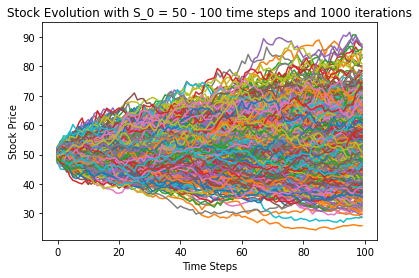

In [13]:
MC.plot_path()

In [14]:
print(MC.pricing())

10.966349036428852
